## Регресионный анализ 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math 

In [2]:
df = pd.read_csv('states.csv')

In [3]:
df.sample(5)

,state,metro_res,white,hs_grad,poverty,female_house
21,Massachusetts,91.4,87.2,87.1,9.6,11.9
14,Indiana,70.8,88.9,86.4,8.7,11.1
38,Pennsylvania,77.1,86.4,86.0,9.2,11.6
33,North Carolina,60.2,74.1,81.4,13.1,12.5
2,Arizona,88.2,87.7,83.8,13.3,11.1


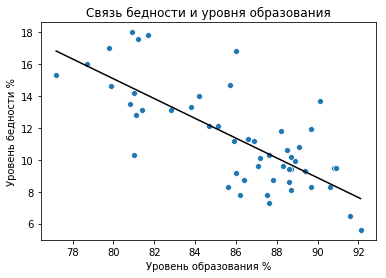

In [98]:
sp = sns.scatterplot(x='hs_grad', y='poverty', data=df);
b0, b1 = least_squares_method(df, 'poverty','hs_grad')
x=np.linspace(df["hs_grad"].min(),df["hs_grad"].max(),100)
y = b0 + b1*x
plt.plot(x,y, 'k') 
sp.set_title('Связь бедности и уровня образования');
sp.set_xlabel("Уровень образования %");
sp.set_ylabel("Уровень бедности %");

In [21]:
table = pd.DataFrame(columns=['Statistic', 'N', 'Mean', 'St.Dev', 'Min', 'Max'])

In [8]:
columns = ['poverty','hs_grad']

In [24]:
table['Statistic'] = columns

In [33]:
# Descriptive statistics
table.loc[table['Statistic'] == 'poverty', 'N'] = df['poverty'].count()
table.loc[table['Statistic'] == 'hs_grad', 'N'] = df['hs_grad'].count()
table.loc[table['Statistic'] == 'poverty', 'Mean'] = round(df['poverty'].mean(),1)
table.loc[table['Statistic'] == 'hs_grad', 'Mean'] = round(df['hs_grad'].mean(),1)
table.loc[table['Statistic'] == 'poverty', 'St.Dev'] = round(df['poverty'].std(),1)
table.loc[table['Statistic'] == 'hs_grad', 'St.Dev'] = round(df['hs_grad'].std(),1)
table.loc[table['Statistic'] == 'poverty', 'Min'] = round(df['poverty'].min(),1)
table.loc[table['Statistic'] == 'hs_grad', 'Min'] = round(df['hs_grad'].min(),1)
table.loc[table['Statistic'] == 'poverty', 'Max'] = round(df['poverty'].max(),1)
table.loc[table['Statistic'] == 'hs_grad', 'Max'] = round(df['hs_grad'].max(),1)

In [34]:
table.head()

,Statistic,N,Mean,St.Dev,Min,Max
0,poverty,51,11.3,3.1,5.6,18
1,hs_grad,51,86,3.7,77.2,92.1


In [72]:
def correlation(df, dependent_var, independent_var):
    poverty_mean = df[dependent_var].mean()
    hs_grad_mean = df[independent_var].mean()
    r = (sum((row[dependent_var] - poverty_mean)  * (row[independent_var] - hs_grad_mean) for index, row in df.iterrows()))/(math.sqrt((sum((x - poverty_mean) **2 for x in df[dependent_var])) * (sum((y - hs_grad_mean)**2 for y in df[independent_var]))))
    return r
correlation(df,'poverty', 'hs_grad')

-0.7468582531582505

In [74]:
def least_squares_method(df, dependent_var, independent_var):
    r = correlation(df,dependent_var, independent_var)
    sdy = df[dependent_var].std()
    sdx = df[independent_var].std()
    My = df[dependent_var].mean()
    Mx = df[independent_var].mean()
    b1 = (sdy/sdx)*r
    b0 = My - (b1*Mx)
    return b0, b1
least_squares_method(df,'poverty', 'hs_grad')

(64.78096577010206, -0.6212167177940103)

In [ ]:
def regression(df, dependent_var, independent_var):
    table = pd.DataFrame(columns=['Values', 'Estimate', 'Std Error', 't value', 'p-value'])
    columns = ['intercept', 'slope']
    table['Values'] = columns
    b0, b1 = least_squares_method(df, dependent_var, independent_var)
    table.loc[table['Values']=='intercept', 'Estimate'] =  b0
    table.loc[table['Values'] == 'slope', 'Estimate'] = b1
    x=np.linspace(df[independent_var].min(),df[independent_var].max(),100)
    x_mean = x.mean()
    y = b0 + b1*x
    y_mean = y.mean()
    D = math.sqrt(sum((elem - x_mean)**2)/51)

In [116]:
b0, b1 = least_squares_method(df, 'poverty', 'hs_grad')
x=np.linspace(df['hs_grad'].min(),df['hs_grad'].max(),100)
x_mean = x.mean()
y = b0 + b1*x
y_mean = y.mean()
#sd_err_b0 = 
math.sqrt(sum((elem - x_mean) **2 for elem in x)/df['state'].count())
#math.sqrt(sum((elem - y_mean) **2 for elem in y)/df['state'].count())

6.0835018846519455

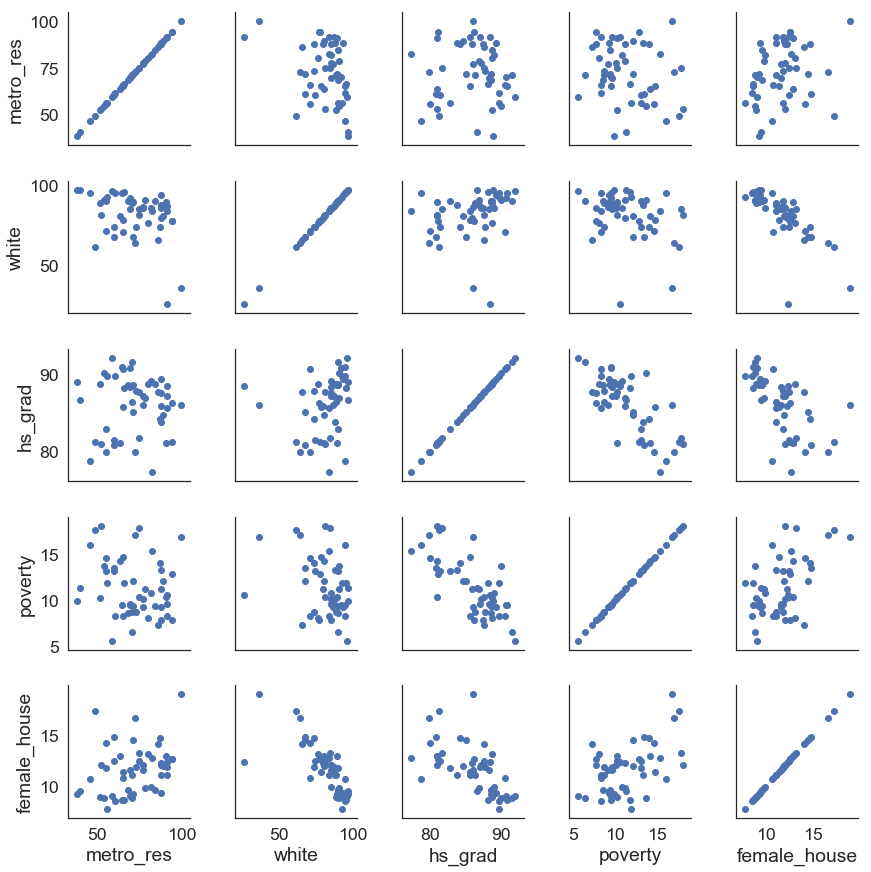

In [133]:
corr.style.background_gradient(cmap='coolwarm')

,metro_res,white,hs_grad,poverty,female_house
metro_res,1,-0.342442,0.0181105,-0.204235,0.300062
white,-0.342442,1,0.238156,-0.30852,-0.751394
hs_grad,0.0181105,0.238156,1,-0.746858,-0.611867
poverty,-0.204235,-0.30852,-0.746858,1,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1


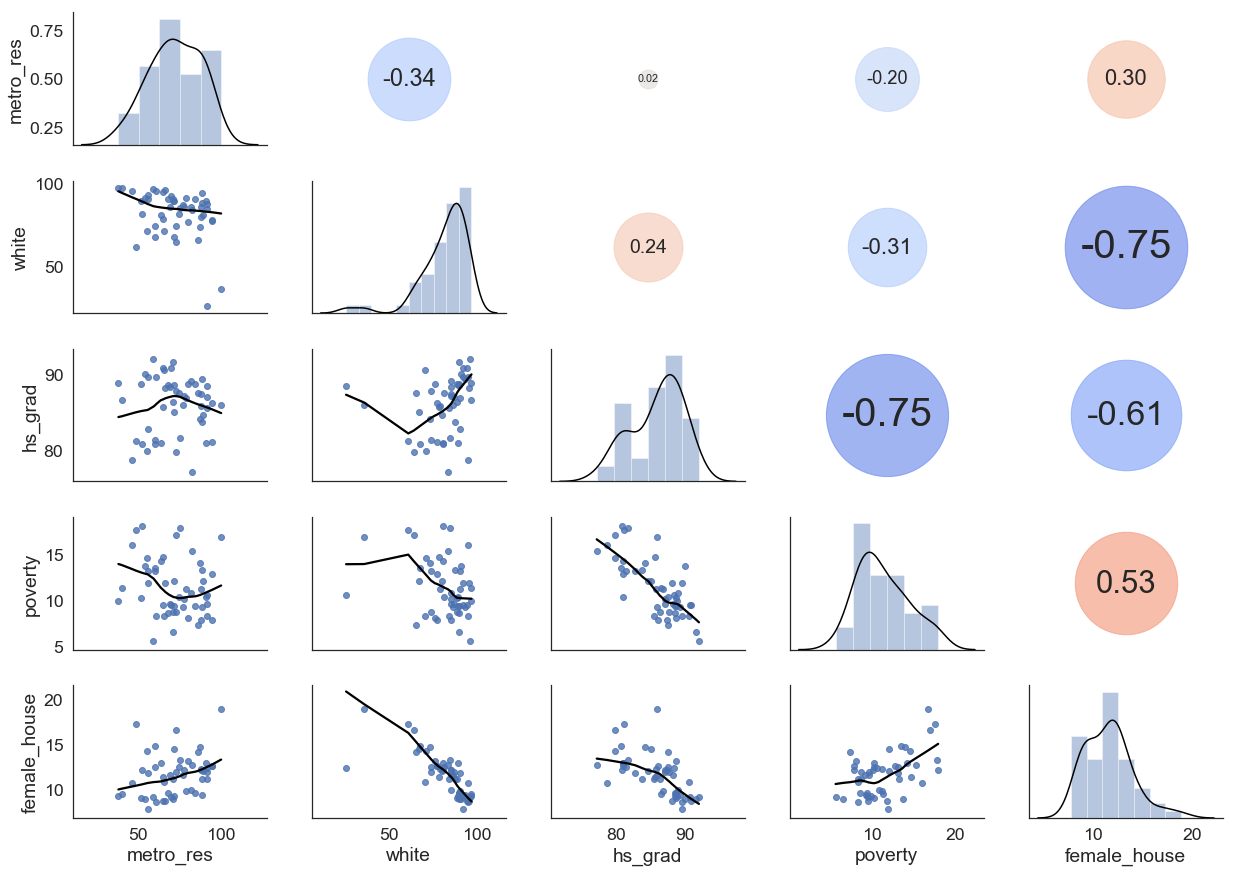

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}"
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 20000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 10
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

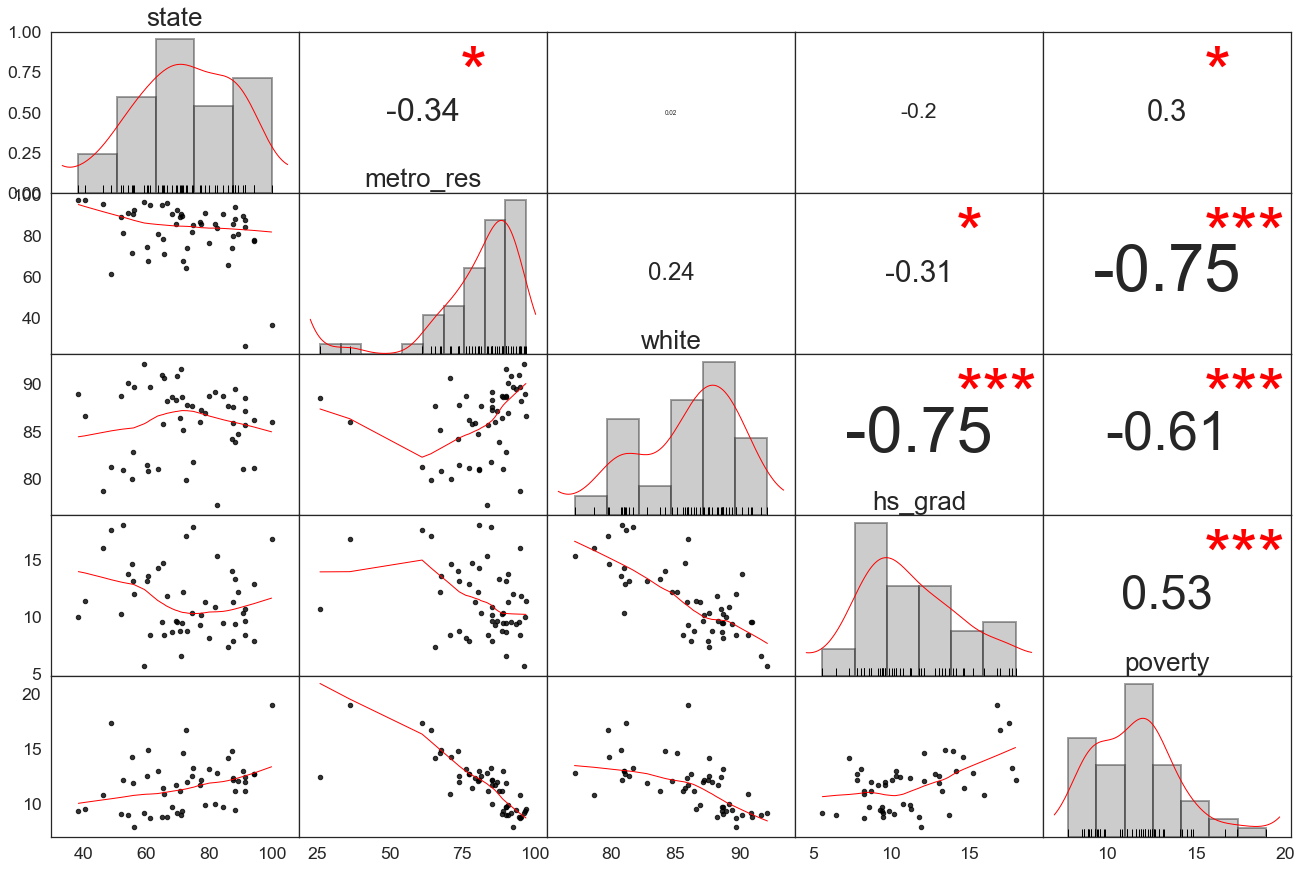

In [161]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df.columns):
    ax.set_title(col, y=0.82, fontsize=26)

In [166]:
from scipy.stats import linregress
print (linregress(df['poverty'],df['hs_grad'] ))

LinregressResult(slope=-0.8979108809102488, intercept=96.20217289942846, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.11421094611810681)


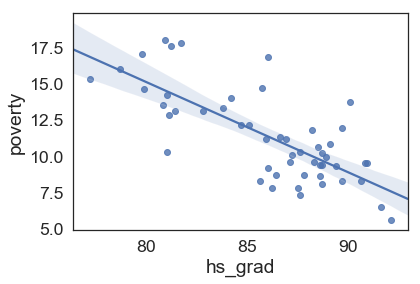

In [169]:
sns.regplot(y=df['poverty'], x=df['hs_grad'])

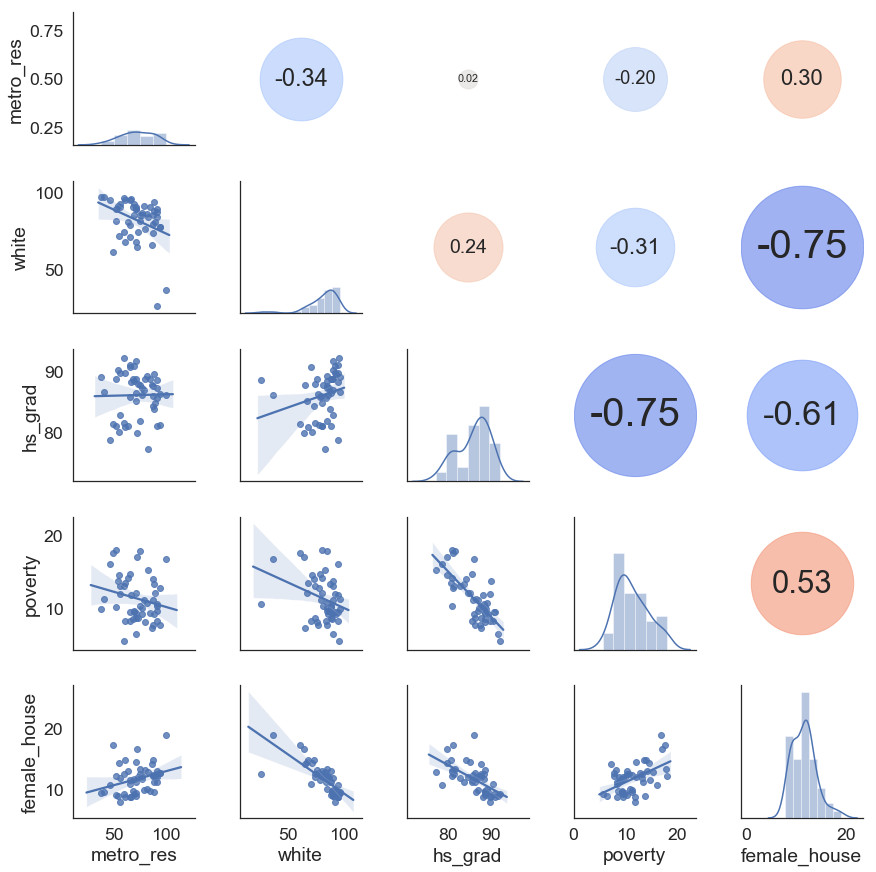

In [182]:
grid = sns.PairGrid(df);
grid.map_lower(sns.regplot);
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}"
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 20000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 10
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
grid.map_upper(corrdot);
grid.map_diag(sns.distplot);